In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
# Define paths
base_dir = "../"  # Base directory, relative to the notebook
processed_dir = os.path.join(base_dir, "data", "processed")
processed_file_path = os.path.join(processed_dir, "final_merged_stock_data.csv")

In [40]:
# **Load Data**
def load_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the stock data."""
    df = pd.read_csv(file_path, parse_dates=["Date"])
    df.sort_values(by="Date", inplace=True)
    return df

In [41]:
# **Find Available Stocks**
def get_stock_columns(df: pd.DataFrame):
    """Identify unique stock tickers from column names."""
    tickers = set()
    for col in df.columns:
        if "_" in col:
            ticker = col.split("_")[0]  # Extract stock ticker (e.g., "AAPL" from "AAPL_Close")
            tickers.add(ticker)
    return sorted(tickers)

In [42]:
# **Plot Stock Prices**
def plot_stock_prices(df: pd.DataFrame, stocks: list, title: str = "Stock Prices Over Time"):
    """Plot closing prices of selected stocks."""
    plt.figure(figsize=(14, 7))
    
    for stock in stocks:
        col_name = f"{stock}_Close"
        if col_name in df.columns:
            plt.plot(df["Date"], df[col_name], label=f"{stock} Close")
    
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
# **Plot Trading Volume**
def plot_trading_volume(df: pd.DataFrame, stocks: list, title: str = "Trading Volume Over Time"):
    """Plot trading volumes of selected stocks."""
    plt.figure(figsize=(14, 7))
    
    for stock in stocks:
        col_name = f"{stock}_Volume"
        if col_name in df.columns:
            plt.bar(df["Date"], df[col_name], label=f"{stock} Volume", alpha=0.6)
    
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True)
    plt.show()


In [44]:
# **Plot Moving Averages**
def plot_moving_averages(df: pd.DataFrame, stocks: list, window_sizes=[20, 50, 100], title="Stock Prices with Moving Averages"):
    """Plot moving averages for selected stocks."""
    plt.figure(figsize=(14, 7))

    for stock in stocks:
        col_name = f"{stock}_Close"
        if col_name in df.columns:
            plt.plot(df["Date"], df[col_name], label=f"{stock} Close", alpha=0.7)
            for window in window_sizes:
                df[f"{stock}_SMA_{window}"] = df[col_name].rolling(window=window).mean()
                plt.plot(df["Date"], df[f"{stock}_SMA_{window}"], label=f"{stock} {window}-Day SMA", linestyle="dashed")

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
def plot_correlation_heatmap(df: pd.DataFrame, title: str = "Stock Price Correlation Heatmap"):
    """Plot correlation heatmap for stock closing prices with wider figure size."""
    close_cols = [col for col in df.columns if "Close" in col]
    
    plt.figure(figsize=(16, 10))  # **Wider & taller for clarity**
    correlation = df[close_cols].corr()
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [46]:
# **Decompose Time Series for Trends & Seasonality**
def decompose_time_series(df: pd.DataFrame, stock: str, column: str = "Close"):
    """Perform seasonal decomposition for a given stock."""
    col_name = f"{stock}_{column}"
    if col_name not in df.columns:
        print(f"⚠️ {col_name} not found in dataset.")
        return

    ts = df.set_index("Date")[col_name].dropna()
    
    decomposition = seasonal_decompose(ts, model='additive', period=365)  # Assuming daily data
    
    plt.figure(figsize=(14, 10))
    plt.subplot(4, 1, 1)
    plt.plot(ts, label="Observed", color="blue")
    plt.legend(loc="best")
    plt.title(f"{stock} {column} Prices - Observed")

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label="Trend", color="orange")
    plt.legend(loc="best")
    plt.title("Trend Component")

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label="Seasonality", color="green")
    plt.legend(loc="best")
    plt.title("Seasonal Component")

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label="Residuals", color="red")
    plt.legend(loc="best")
    plt.title("Residual Component")
    plt.tight_layout()
    plt.show()


In [52]:
def plot_rolling_mean(df: pd.DataFrame, stocks: list, columns: list = ["Close"], window: int = 30):
    """Plot rolling mean for selected stocks and price types with larger figure size."""
    plt.figure(figsize=(18, 8))  # **Wider for better visibility**

    for stock in stocks:
        for col in columns:
            col_name = f"{stock}_{col}"
            if col_name in df.columns:
                plt.plot(df["Date"], df[col_name], label=f"{stock} {col} Prices", alpha=0.7)
                plt.plot(df["Date"], df[col_name].rolling(window=window).mean(), 
                         label=f"{stock} {col} {window}-Day Rolling Mean", linestyle="dashed", linewidth=2)

    plt.title(f"Stock Prices with {window}-Day Rolling Mean", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price ($)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

✅ Available Stocks: ['AAPL', 'AMZN', 'GOOGL', 'IBM', 'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA']


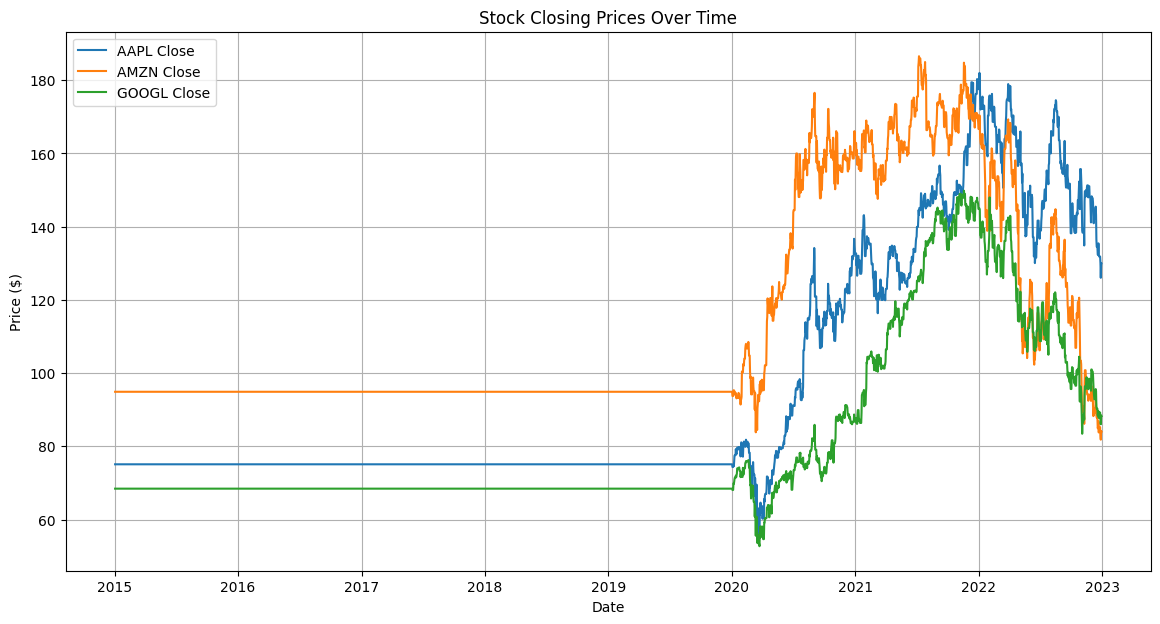

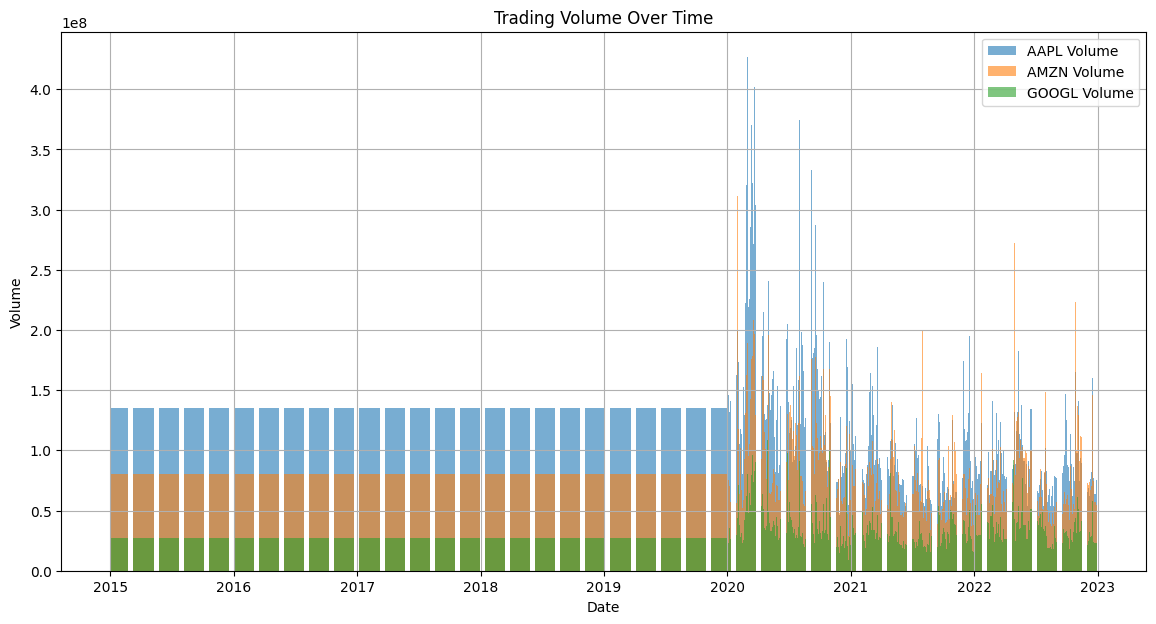

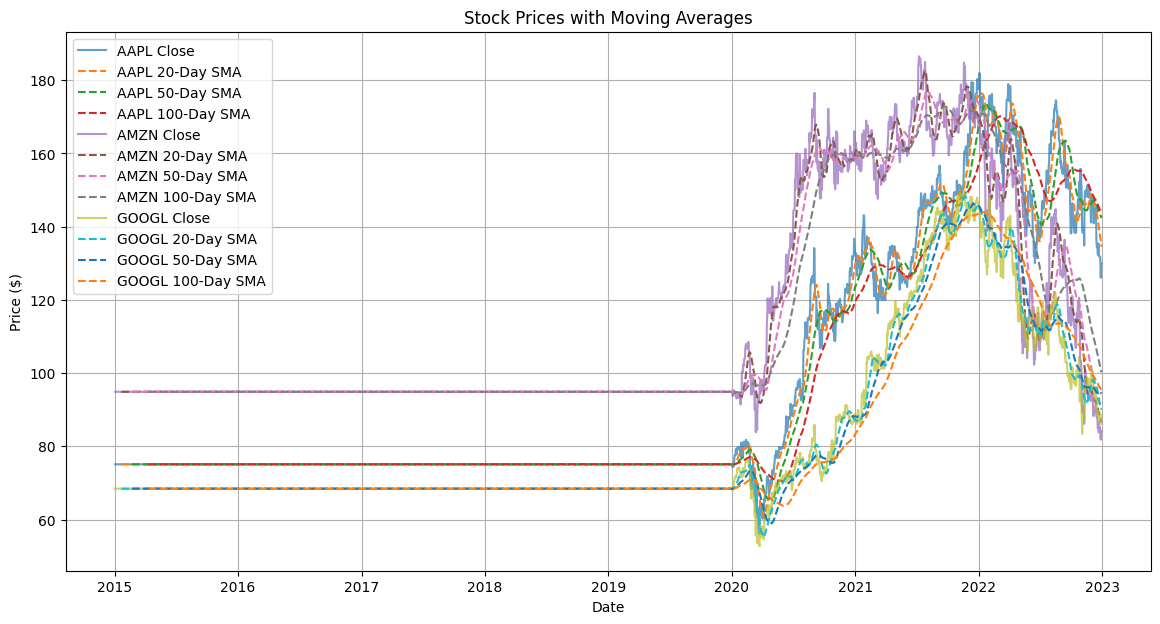

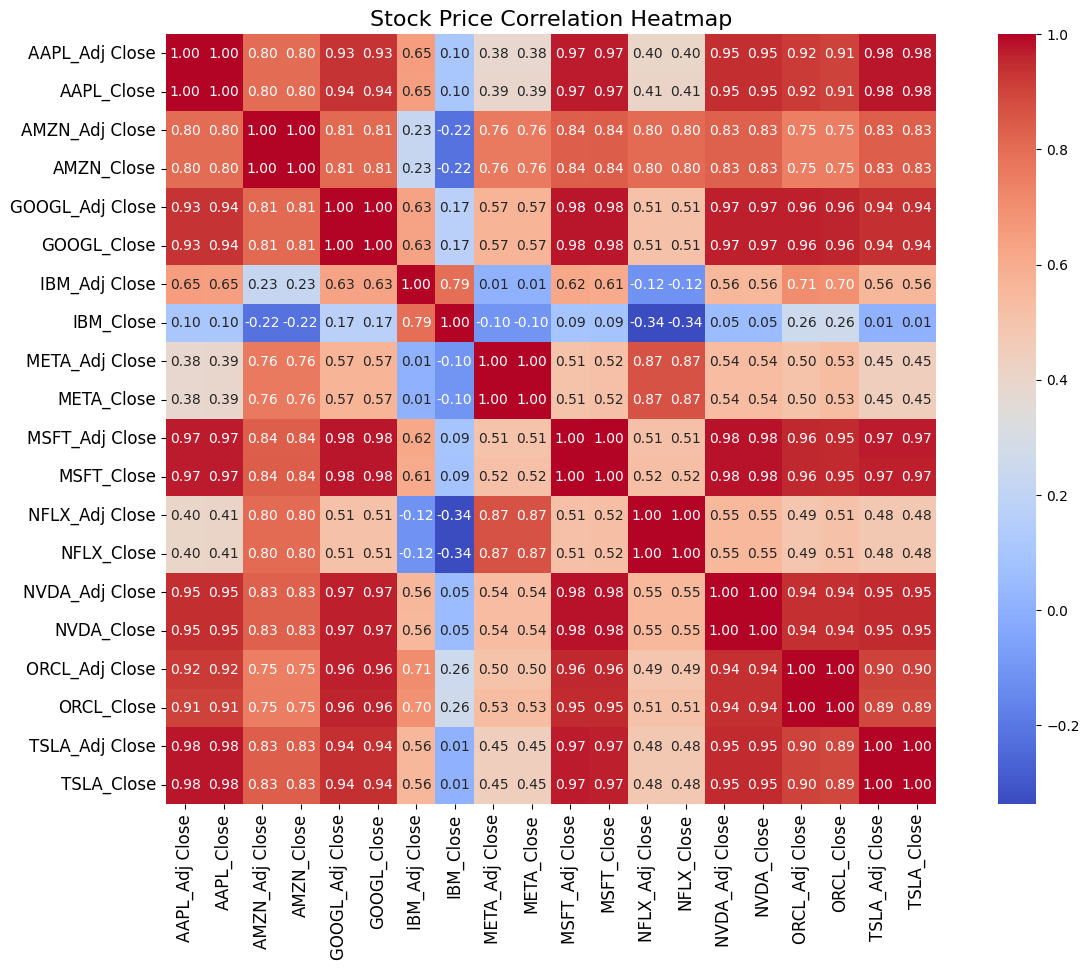

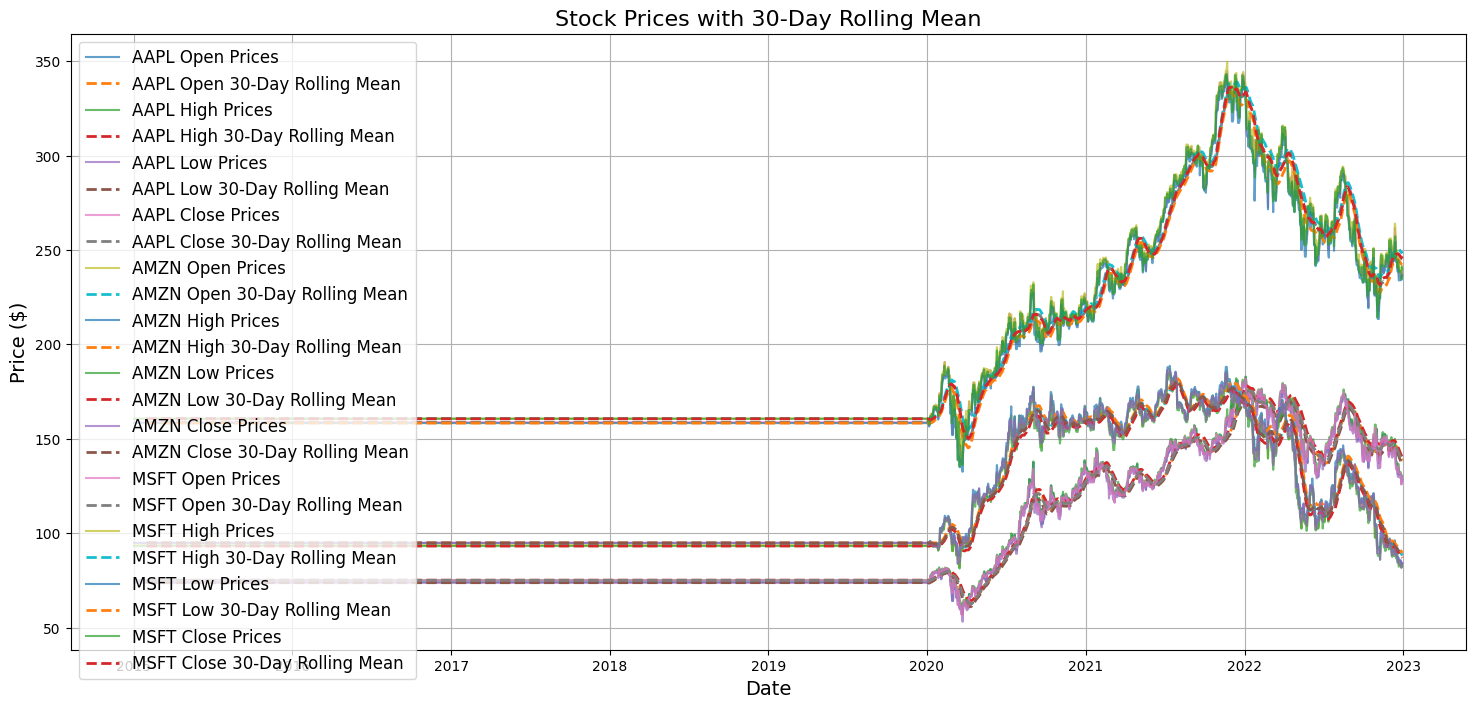

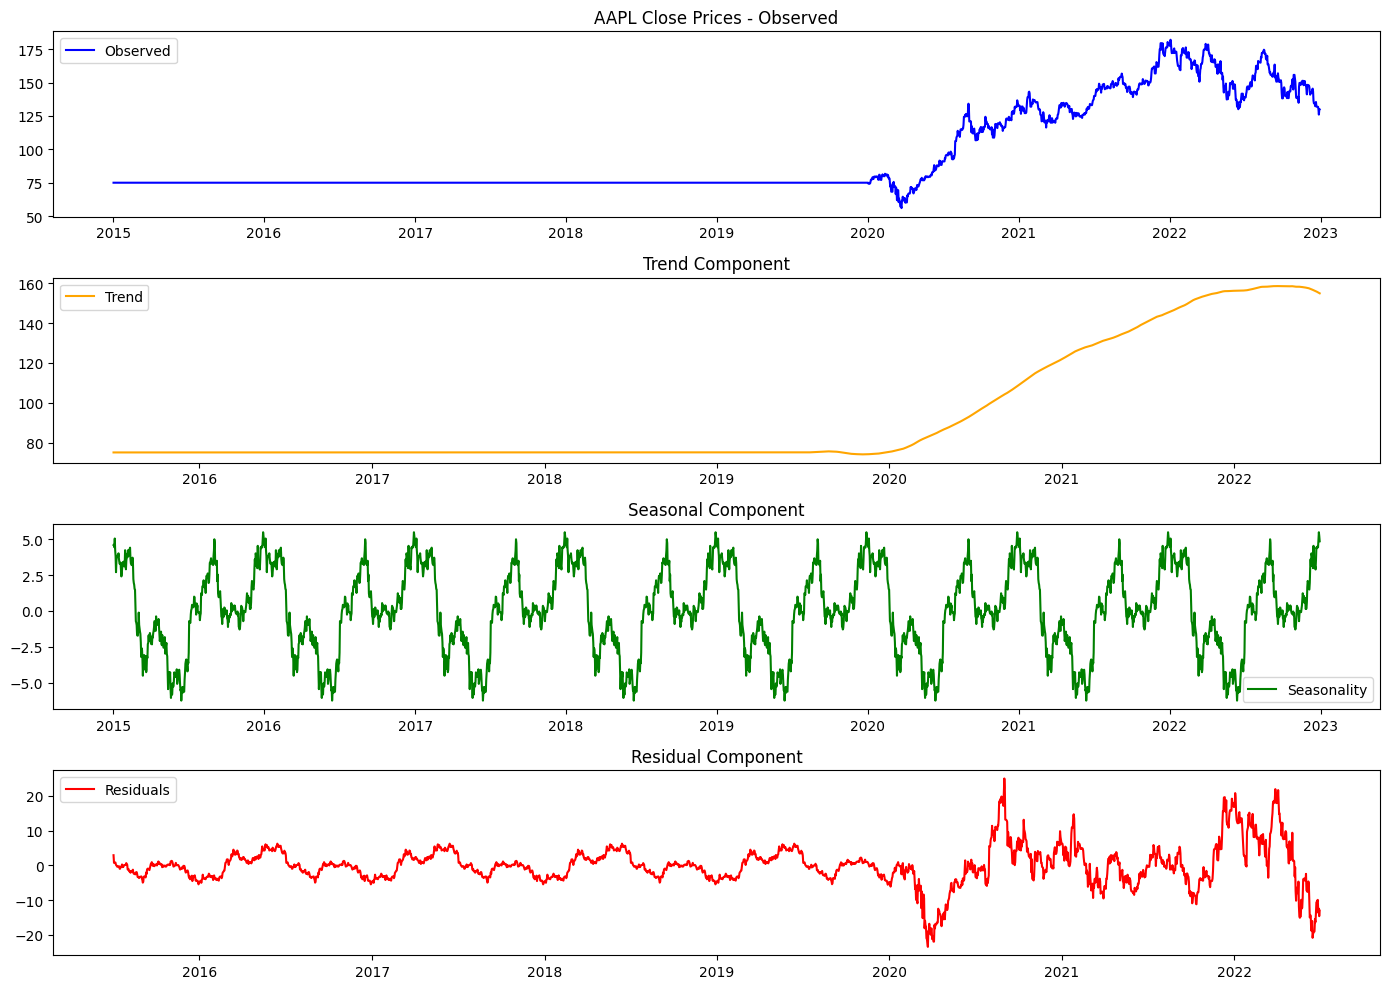

In [53]:
if __name__ == '__main__':
    # Load data
    df_clean = load_data(processed_file_path)

    # Identify available stocks
    stocks_available = get_stock_columns(df_clean)
    print(f"✅ Available Stocks: {stocks_available}")

    # **Perform EDA for the first 3 stocks (adjust as needed)**
    selected_stocks = stocks_available[:3]  # Analyze first 3 stocks

    plot_stock_prices(df_clean, selected_stocks, "Stock Closing Prices Over Time")
    plot_trading_volume(df_clean, selected_stocks, "Trading Volume Over Time")
    plot_moving_averages(df_clean, selected_stocks, window_sizes=[20, 50, 100])

    # **Plot Correlation Heatmap**
    plot_correlation_heatmap(df_clean)

    # **Perform time-series analysis on AAPL**
    if "AAPL" in stocks_available:
        plot_rolling_mean(df_clean, stocks=["AAPL", "AMZN", "MSFT"], columns=["Open", "High", "Low", "Close"], window=30)

        decompose_time_series(df_clean, stock="AAPL", column="Close")

### RUN THE BELOW SCRIPT TO DOWNLOAD THESE GRAPHS

you can change the value as per the dataset and get the graphs for each stake holder companies you want.


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# **Set File Paths**
base_dir = "../"  # Adjust as needed
processed_dir = os.path.join(base_dir, "data", "processed")
processed_file_path = os.path.join(processed_dir, "final_merged_stock_data.csv")

# **Set Output Folder**
output_dir = "eda_outputs"
os.makedirs(output_dir, exist_ok=True)  # Create the folder if it doesn't exist

# **Load Data**
def load_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the stock data."""
    df = pd.read_csv(file_path, parse_dates=["Date"])
    df.sort_values(by="Date", inplace=True)
    return df

# **Find Available Stocks**
def get_stock_columns(df: pd.DataFrame):
    """Identify unique stock tickers from column names."""
    tickers = set()
    for col in df.columns:
        if "_" in col:
            ticker = col.split("_")[0]  # Extract stock ticker (e.g., "AAPL" from "AAPL_Close")
            tickers.add(ticker)
    return sorted(tickers)

# **Save Plot Utility**
def save_plot(fig, filename):
    """Save the current figure to the output directory."""
    fig.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches="tight")
    plt.close(fig)  # Close figure to free memory

# **Plot & Save Stock Prices**
def plot_stock_prices(df: pd.DataFrame, stocks: list):
    """Plot and save stock closing prices."""
    fig, ax = plt.subplots(figsize=(18, 8))
    
    for stock in stocks:
        col_name = f"{stock}_Close"
        if col_name in df.columns:
            ax.plot(df["Date"], df[col_name], label=f"{stock} Close")

    ax.set_title("Stock Closing Prices Over Time", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Price ($)", fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)

    save_plot(fig, "stock_prices.png")

# **Plot & Save Correlation Heatmap**
def plot_correlation_heatmap(df: pd.DataFrame):
    """Plot and save correlation heatmap for stock closing prices."""
    fig, ax = plt.subplots(figsize=(16, 10))
    
    close_cols = [col for col in df.columns if "Close" in col]
    correlation = df[close_cols].corr()
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True, ax=ax)

    ax.set_title("Stock Price Correlation Heatmap", fontsize=16)
    save_plot(fig, "correlation_heatmap.png")

# **Plot & Save Moving Averages**
def plot_moving_averages(df: pd.DataFrame, stocks: list, window_sizes=[20, 50, 100]):
    """Plot and save moving averages for selected stocks."""
    fig, ax = plt.subplots(figsize=(18, 8))

    for stock in stocks:
        col_name = f"{stock}_Close"
        if col_name in df.columns:
            ax.plot(df["Date"], df[col_name], label=f"{stock} Close", alpha=0.7)
            for window in window_sizes:
                df[f"{stock}_SMA_{window}"] = df[col_name].rolling(window=window).mean()
                ax.plot(df["Date"], df[f"{stock}_SMA_{window}"], label=f"{stock} {window}-Day SMA", linestyle="dashed", linewidth=2)

    ax.set_title("Stock Prices with Moving Averages", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Price ($)", fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)

    save_plot(fig, "moving_averages.png")

# **Plot & Save Rolling Mean**
def plot_rolling_mean(df: pd.DataFrame, stocks: list, columns: list = ["Close"], window: int = 30):
    """Plot and save rolling mean for selected stocks and price types."""
    fig, ax = plt.subplots(figsize=(18, 8))

    for stock in stocks:
        for col in columns:
            col_name = f"{stock}_{col}"
            if col_name in df.columns:
                ax.plot(df["Date"], df[col_name], label=f"{stock} {col} Prices", alpha=0.7)
                ax.plot(df["Date"], df[col_name].rolling(window=window).mean(), 
                         label=f"{stock} {col} {window}-Day Rolling Mean", linestyle="dashed", linewidth=2)

    ax.set_title(f"Stock Prices with {window}-Day Rolling Mean", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Price ($)", fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)

    save_plot(fig, "rolling_mean.png")

# **Run EDA and Save All Graphs**
if __name__ == '__main__':
    # Load data
    df_clean = load_data(processed_file_path)

    # Identify available stocks
    stocks_available = get_stock_columns(df_clean)
    print(f"✅ Available Stocks: {stocks_available}")

    # Select first 3 stocks for analysis
    selected_stocks = stocks_available[:3]  

    # Generate and save plots
    plot_stock_prices(df_clean, selected_stocks)
    plot_correlation_heatmap(df_clean)
    plot_moving_averages(df_clean, selected_stocks, window_sizes=[20, 50, 100])
    plot_rolling_mean(df_clean, selected_stocks, columns=["Open", "High", "Low", "Close"], window=30)

    print(f"✅ All plots saved in '{output_dir}' folder.")
